# PROBLEM_STATEMENT

* Data has been collected from internet by applying Web-scrapping techniques.And this data related to cloths ,there are two different kinds of classes present in this data.one type is shirt and other type is T-shirt.
* Here need to classify them with good accuracy and with low loss.
* To know best optimizers ,i'm going to use all the optimizers and after that i'm going to choose best one depends on validation loss and validation accuracy.


# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import scipy
import os
os.getcwd()

'C:\\Users\\HP'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,ZeroPadding2D,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img , img_to_array , load_img
from tensorflow.keras.optimizers import Adam,RMSprop,Nadam,SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras import regularizers
import pylab as pl
import os
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import utils
from tensorflow.keras import utils as np_utils

In [3]:
# MANUALLY RESIZING THE IMAGE SIZES FOR THE OUTPUT
input_shape=(100,100,3)
image_width=100
image_height=100

In [4]:
nb_train_samples=350
nb_validation_samples=30

batch_size=12
epochs = 20
#LOADING DATA FROM LOCAL SYSTEM TO NOTEBOOK
train_data_dir="C:/Users/HP/Desktop/Augmentation"
validation_data_dir="C:/Users/HP/Documents/Validation"

In [5]:
#Rescale the pixels values from [0,255] to [0,1] interval
datagen=ImageDataGenerator(rescale=1./255)

#automatically retrieves images and their classes for train and validation sets
train_generator=datagen.flow_from_directory(
                    train_data_dir,
                    target_size=(image_width,image_height),
                     batch_size=batch_size ,class_mode='categorical')

validation_generator=datagen.flow_from_directory(
                    validation_data_dir,
                    target_size=(image_width,image_height),
                     batch_size=batch_size ,class_mode='categorical')

Found 834 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [6]:
print(train_generator.class_indices)

{'men-shirt': 0, 'men-t-shirt': 1}


From above we can observe that men-shirt is 0 and men-t-shirt is 1.

# Creating CONVOLUTIONAL NEURAL NETWORK

In [7]:
# BUILDING CNN MODEL LAYERS
Optimizer = [Adam(lr=0.001),RMSprop(lr=0.001),Nadam(lr=0.001),SGD(lr=0.001,momentum=0.9,nesterov=True)]
for i in Optimizer:
    model = Sequential()
    #FIRST CONVOLUTION +RELU LAYER
    
    model.add(Conv2D(16, kernel_size=2,activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=2))
    
    
    #SECOND CONVOLUTION + RELU LAYER
    
    model.add(Conv2D(32, 2, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    
    
    #THIRD CONVOLUTION + RELU LAYER
    model.add(Conv2D(64, 2, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
     
    #ADDING DROPOUT
    model.add(Dropout(0.21))
    
    #FULLY CONNECTED LAYER
    model.add(Flatten())
    model.add(Dense(64,activation='relu')

    model.add(Dense(2,activation='softmax'))
    
    #STORING EACH CHECK POINT 
    checkpoint = ModelCheckpoint(r"C:\Users\HP\Desktop\Augmentation\classification of shirts vs t-shirts.h5",
                                monitor="val_loss",mode='min', save_best_only=True, verbose=1)
    
    earlyStop = EarlyStopping(monitor="val_loss", min_delta=0, patience=4, verbose=1, restore_best_weights=True)
    
    reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=3,verbose=1, min_delta=0.0001)
    
    callback = [checkpoint,earlyStop,reduceLR]
    print("Optimizer : ",i)
    print(model.summary())
    
    #COMPILING MODEL 
    model.compile(loss = 'categorical_crossentropy',optimizer=i,   metrics = ['accuracy'])
    
    #FITTING MODEL
    history = model.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,epochs=epochs,
                           validation_data=validation_generator,callbacks=callback,
                            validation_steps=nb_validation_samples//batch_size)


Optimizer :  <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000002A56E2CA2C8>
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 99, 99, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_______________________________

From above we can observe that Nadam optimizer working well commpare to all other optimizers..Compare to all other optimizers validation loss is also very less ,so now i'm going to use Nadam and training model again and finally testing model to check the results.

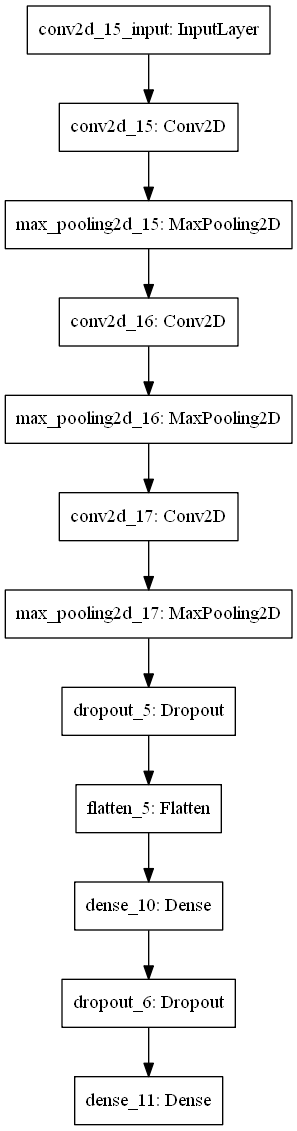

In [31]:
keras.utils.plot_model(model=model,to_file='model.png')

In [13]:
model = Sequential()
#FIRST CONVOLUTION +RELU LAYER
    
model.add(Conv2D(16, kernel_size=2,activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))
    
    
#SECOND CONVOLUTION + RELU LAYER
    
model.add(Conv2D(32, 2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
    
    
    
#THIRD CONVOLUTION + RELU LAYER
model.add(Conv2D(64, 2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
     
model.add(Dropout(0.3))
#FULLY CONNECTED LAYER
model.add(Flatten())
model.add(Dense(64,activation='relu'))

#ADD DROPOUT
model.add(Dropout(0.2))

model.add(Dense(2,activation='softmax'))


print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 99, 99, 16)        208       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 48, 48, 32)        2080      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 23, 23, 64)        8256      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 11, 11, 64)       

In [14]:
#COMPILING MODEL 
model.compile(loss = 'categorical_crossentropy',optimizer=Nadam(lr=0.001),   metrics = ['accuracy'])

In [15]:
#FITTING MODEL 
history = model.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,epochs=epochs,
                           validation_data=validation_generator,
                            validation_steps=nb_validation_samples//batch_size)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 29 steps, validate for 2 steps
Epoch 1/20
29/29 [==============================] - 5s 166ms/step - loss: 0.6329 - accuracy: 0.6868 - val_loss: 0.6983 - val_accuracy: 0.5833
Epoch 2/20
29/29 [==============================] - 2s 75ms/step - loss: 0.5831 - accuracy: 0.7047 - val_loss: 0.6101 - val_accuracy: 0.6250
Epoch 3/20
29/29 [==============================] - 2s 75ms/step - loss: 0.5486 - accuracy: 0.7098 - val_loss: 0.5692 - val_accuracy: 0.6250
Epoch 4/20
29/29 [==============================] - 2s 75ms/step - loss: 0.4630 - accuracy: 0.7557 - val_loss: 0.6942 - val_accuracy: 0.5833
Epoch 5/20
29/29 [==============================] - 2s 81ms/step - loss: 0.4136 - accuracy: 0.8103 - val_loss: 0.5784 - val_accuracy: 0.7083
Epoch 6/20
29/29 [==============================] - 2s 74ms/step - loss: 0.3503 - accuracy: 0.8392 - val_loss: 0.4003 - val_accuracy: 0.7917
Epoch 7/20
29/29 [==============================] - 2s 79ms/st

# VISUALIZING THE MODEL

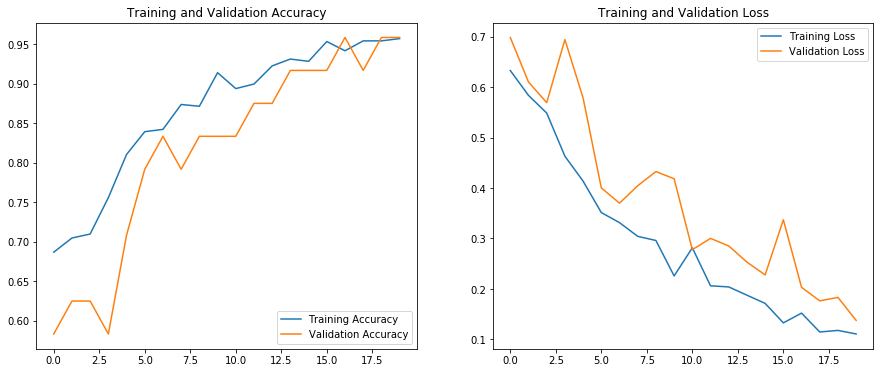

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']



epochs_range = range(epochs)


plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

From above we can observe loss is very low it's good sign and Validation accuracy is also not bad and next step here is to testing model ,to know how our model working well or not..

# TESTING MODEL

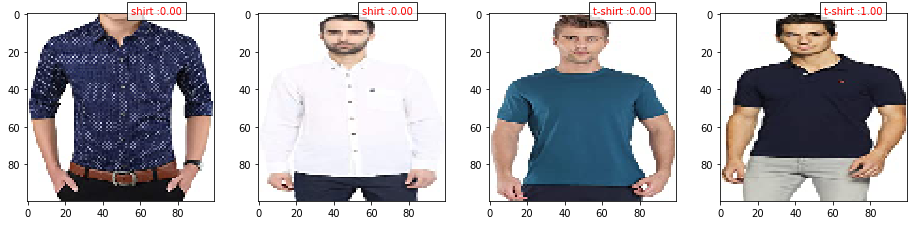

In [22]:
fig=plt.figure(figsize=(20,20))
columns = 5
rows = 5
for i in range(1,5):
    img = load_img(r'C:/Users/HP/Documents/test/'+"img_"+str(i)+'.JPG',target_size=(100,100,3))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    img= img_to_array(img)
    img = np.expand_dims(img, axis=0)
    prediction=model.predict(img)
    if prediction[0][0]==0:
        value ='shirt :%1.2f'%(prediction[0,0])
        plt.text(55, 0,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='t-shirt :%1.2f'%(prediction[0,0])
        plt.text(55, 0,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))

# SAVING MODEL

In [32]:
model.save('callback for classification.h5')

Finally model has been saved ..